<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:

**Student ID**:





## Importing Libraries

First we import libraries that we need for this assignment.

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# import any other libraries needed below
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [151]:
X, Y = None, None

### START CODE HERE ###



dataset = pd.read_csv('data2_logistic.csv', na_values='?')


X = dataset.drop(columns=['Y'])
Y = dataset['Y']

### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:<br>
**Scale Independence:**<br>
Different features in your dataset may have varying scales. For example, one feature might range from 0 to 100, while another ranges from 0 to 0.01.<br>
When you feed such data directly into a machine learning algorithm, it can lead to issues. Some algorithms (like gradient descent-based optimization) are sensitive to the scale of features. Normalization ensures that all features have a similar scale, making the algorithm more robust.<br>
**Faster Convergence:**<br>
Normalization speeds up the convergence of optimization algorithms. When features are on similar scales, the optimization process converges more quickly.<br>
Without normalization, the algorithm might take longer to find the optimal weights or coefficients.<br>
**Avoiding Dominance:**<br>
In some cases, one feature might dominate others due to its larger scale. The model could end up relying heavily on that dominant feature.<br>
Normalization prevents this issue by ensuring that all features contribute equally to the model’s decision-making process<br>

In [152]:
### START CODE HERE ###

X['X1'] = (X['X1'] - X['X1'].mean()) / X['X1'].std()
X['X2'] = (X['X2'] - X['X2'].mean()) / X['X2'].std()
X['X3'] = (X['X3'] - X['X3'].mean()) / X['X3'].std()


### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [153]:
### START CODE HERE ###
X_np=np.array(X)
y_np=np.array(Y)

X_np_1 = np.concatenate((np.ones((X_np.shape[0], 1)), X_np), axis=1)

### END CODE HERE ###

print(X_np_1.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [137]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    return 1 / (1 + np.exp(-Z))
    
    ### START CODE HERE ###
a=np.array([[0,6],[7,8]])
print(sigmoid(a))
    ### END CODE HERE ###

[[0.5        0.99752738]
 [0.99908895 0.99966465]]


### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [138]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = None
    pred=sigmoid(np.dot(X,theta))
    ### START CODE HERE ###
    epsilon = 1e-15  # Small constant to avoid log(0)
    loss = -np.mean(y * np.log(pred + epsilon) + (1 - y) * np.log(1 - pred + epsilon))+(regLambda/2)* np.linalg.norm(theta[1:-1])
    
    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:
<br>
For the  j th element of the gradient with respect to $( \theta_j )$, the calculation is as follows:


$$\frac{\partial J(\theta)}{\partial \theta_j} = \sum_{i=1}^{n} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} + \frac{\lambda}{m}\theta_j $$

In [139]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    h = sigmoid(X.dot(theta))
    reg_p=(regLambda / m) * theta
    reg_p[0]=0
    grad = (1 / m) * X.T.dot(h - y) +reg_p
    ### END CODE HERE ###
    return grad



### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [149]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-6, maxNumIters = 1000):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta, loss_history = None, []
    theta=np.random.randn(n)
    ### START CODE HERE ###
    theta=np.random.randn(n)
    for _ in range(maxNumIters):
        theta_new= theta - alpha * computeGradient(theta,X, y, regLambda)
        if(hasConverged(theta,theta_new,epsilon)):
            break
        else:
            theta=theta_new
            loss_history=loss_history+[computeCost(theta,X,y,regLambda)]
           

    ### END CODE HERE ###
   
    return theta, np.array(loss_history)


def fit2(X, y,X_test,y_test, regLambda = 0.01, alpha = 0.01, epsilon = 1e-6, maxNumIters = 1000):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta, loss_history ,loss_test= None, [],[]
    theta=np.random.randn(n)
    ### START CODE HERE ###
    theta=np.random.randn(n)
    for _ in range(maxNumIters):
        theta_new= theta - alpha * computeGradient(theta,X, y, regLambda)
        if(hasConverged(theta,theta_new,epsilon)):
            break
        else:
            theta=theta_new
            loss_history=loss_history+[computeCost(theta,X,y,regLambda)]
            loss_test=loss_test+[computeCost(theta,X_test,y_test,regLambda)]

    ### END CODE HERE ###
   
    return theta, np.array(loss_history),np.array(loss_test)


"""
 num_samples, num_features = X.shape
        self.weights = np.random.randn(num_features, self.num_classes)

        for _ in range(self.min_iterations):
            logits = X.dot(self.weights)
            probs = self.softmax(logits)
            #print(y)
            gradient = X.T.dot(probs - y) / num_samples
            self.weights -= self.learning_rate * gradient
"""

def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    ### START CODE HERE ###
    if(np.linalg.norm((theta_new-theta_old))<epsilon**2):
        return True

    ### END CODE HERE ###
    return False

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [154]:
theta, loss_history = fit(X_np_1, y_np) # calculating theta and loss of each iteration

### START CODE HERE ###
print(loss_history)
print(theta)
### END CODE HERE ###

[0.88026944 0.87802769 0.8757925  0.87356388 0.87134182 0.86912632
 0.86691737 0.86471497 0.86251912 0.86032981 0.85814703 0.85597079
 0.85380107 0.85163788 0.84948121 0.84733106 0.84518741 0.84305028
 0.84091964 0.8387955  0.83667785 0.83456669 0.832462   0.83036379
 0.82827206 0.82618678 0.82410797 0.8220356  0.81996969 0.81791021
 0.81585717 0.81381056 0.81177037 0.8097366  0.80770923 0.80568827
 0.80367371 0.80166554 0.79966375 0.79766833 0.79567928 0.7936966
 0.79172027 0.78975029 0.78778665 0.78582934 0.78387835 0.78193368
 0.77999532 0.77806327 0.7761375  0.77421802 0.77230482 0.77039789
 0.76849722 0.7666028  0.76471462 0.76283268 0.76095697 0.75908747
 0.75722418 0.75536709 0.7535162  0.75167148 0.74983293 0.74800055
 0.74617432 0.74435424 0.74254029 0.74073246 0.73893075 0.73713515
 0.73534563 0.73356221 0.73178486 0.73001357 0.72824834 0.72648915
 0.72473599 0.72298886 0.72124774 0.71951263 0.7177835  0.71606035
 0.71434317 0.71263195 0.71092668 0.70922734 0.70753393 0.70584

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [155]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X_np_1, y_np, test_size=0.1, random_state=42)

# Further split training set into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(2/9), random_state=42)

theta1,loss_his=fit(X_train,y_train,regLambda=0.05,maxNumIters=5000)

pred=predict(X_test,theta1)
accuracy_score(y_test,pred)
### END CODE HERE ###

0.993

Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [93]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    z = np.dot(X, theta) 
    predictions = sigmoid(z)
    
    Y = np.round(predictions)
    ### START CODE HERE ###

    ### END CODE HERE ###
    return Y

In [143]:
def plot_multiple_r2_on_same_axis(train_test_ratios, r2_values_list, labels,ylim,x_label,y_label,title,log):
    
    assert len(r2_values_list) == len(labels), "Number of R² value vectors must match the number of labels"
    plt.figure(figsize=(15, 8))
    for i, r2_values in enumerate(r2_values_list):
        if(log==0):
            plt.plot(train_test_ratios, r2_values, label=labels[i])
        elif(log==1): 
            plt.semilogx(train_test_ratios, r2_values,marker='o', label=labels[i])
        elif(log==2):
            plt.semilogx(train_test_ratios, r2_values, label=labels[i])
        elif(log==3):
            plt.semilogy(train_test_ratios, r2_values, label=labels[i])        
    plt.xlabel(x_label)#'Train Ratio')
    plt.ylabel(y_label)#'R² Value')
    plt.title(title)#'R² vs. Train Ratio')
    plt.ylim(ylim)
    plt.grid(True)
    plt.legend()
    plt.show()

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:
**Learning Rate:**<br>
The learning rate controls how quickly a model updates its parameters during optimization.<br>
Too high a learning rate can lead to overshooting, while too low a rate results in slow convergence.<br>
Finding an optimal learning rate is essential for effective training.<br>
**L2 Regularization:**<br>
L2 regularization adds a penalty term based on the sum of squared coefficients.<br>
It encourages simpler models by shrinking weights and prevents overfitting.<br>
Tuning the regularization strength (λ) is crucial for balancing complexity and generalization.<br>

In summary, learning rate affects the convergence speed and stability, while L2 regularization balances model complexity and generalization. Finding the right combination of both is crucial for effective logistic regression models

`You can see the the best value for them from the plot below`


In [156]:
### START CODE HERE ###
n=3
m=3
regs=np.linspace(0.01,0.1,m)
alphas=np.linspace(0.01,0.1,n)
loss_hises=[]
labels=[]
max_accuracy=0
#number_of_intra=np.array([100,500,1000,2000,5000])
for i in range(m):
    for j in range(n):
        theta1,loss_his,test_loss=fit2(X_train,y_train,X_test,y_test,regLambda=regs[i],alpha=alphas[j],maxNumIters=2500)
        acc=accuracy_score(y_test,predict(X_test,theta1))
        if(acc>max_accuracy):
            max_accuracy=acc
        loss_hises=loss_hises+[loss_his,test_loss]
        labels=labels+[('train RT:'+str(round(regs[i],3))+' LR:'+str(round(alphas[j],3))),('test RT:'+str(round(regs[i],3))+' LR:'+str(round(alphas[j],3)))]
print(max_accuracy)
### END CODE HERE ###

0.999


18 18 ['train RT:0.01 LR:0.01', 'test RT:0.01 LR:0.01', 'train RT:0.01 LR:0.055', 'test RT:0.01 LR:0.055', 'train RT:0.01 LR:0.1', 'test RT:0.01 LR:0.1', 'train RT:0.055 LR:0.01', 'test RT:0.055 LR:0.01', 'train RT:0.055 LR:0.055', 'test RT:0.055 LR:0.055', 'train RT:0.055 LR:0.1', 'test RT:0.055 LR:0.1', 'train RT:0.1 LR:0.01', 'test RT:0.1 LR:0.01', 'train RT:0.1 LR:0.055', 'test RT:0.1 LR:0.055', 'train RT:0.1 LR:0.1', 'test RT:0.1 LR:0.1']


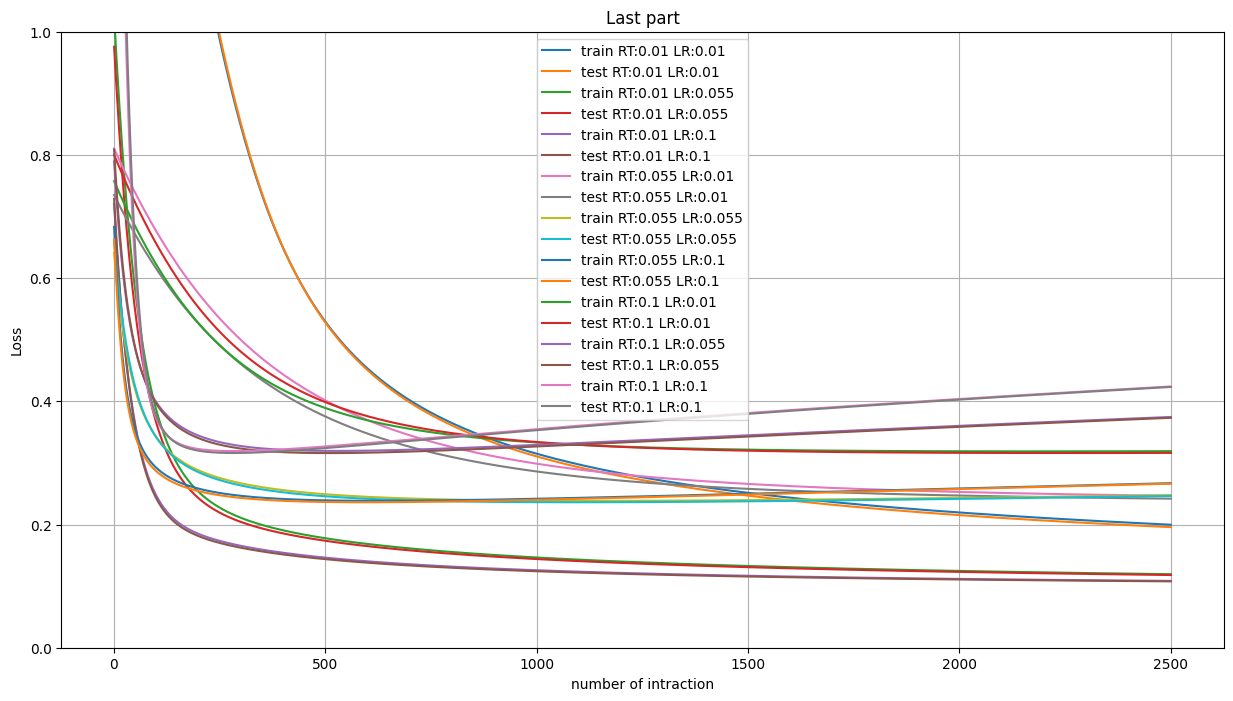

In [157]:
print(len(labels),len(loss_hises),labels)
plot_multiple_r2_on_same_axis(np.arange(1,len(loss_hises[0])+1),loss_hises,labels,[0,1],'number of intraction','Loss','Last part',0)

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:0.9235

In [146]:
### START CODE HERE ###
dataset = pd.read_csv('data2_logistic.csv', na_values='?')

X = dataset.drop(columns=["Y"])  # Features
Y = dataset["Y"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)


y_pred = gnb.predict(X_test)


print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9235
Confusion Matrix:
 [[1104   88]
 [  65  743]]


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.971

In [147]:
### START CODE HERE ###
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)




classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_lda, y_train)


y_pred = classifier.predict(X_test_lda)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

### END CODE HERE ###

Accuracy: 0.971
Confusion Matrix:
 [[1160   32]
 [  26  782]]


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:<br>
As the results show the best method is logistic regression with 0.999 accuracy second is LDA with 0.971 and third is
Naive bayes because the data set is big so overfitting is not a big deal so ML is better than naive bayes , LDA is also very good specially if we needed to generate data.